<a href="https://colab.research.google.com/github/damianmtz98/Aprendizaje-Automatico-MCD/blob/main/Tarea%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tarea 4**


*   Aplicar filtro mediante SelectKBest.
*   Aplica los modelos de selección de características cuidando los supuestos de cada modelo.
*   Busca una o varias métricas para seleccionar características en literatura relacionada con tu problema.
*   Con base en tu investigación, determina las características más relevantes de tu conjunto de datos.
*   Discute por qué crees que las características seleccionadas son las más relevantes y por qué el resto quedaron excluidas en la selección.




In [33]:
import pandas as pd
import matplotlib.pyplot as plt


In [34]:
# Buscaremos explicar la relacion de la variable Edad (Age) con la presion arterial (BP), frecuencia cardiaca (MAX HR), colesterol y si hay presente cardiopatia.
df = pd.read_csv("heart_prediction.csv")
y = df[['Age']]
x = df[['BP','Max HR','Cardiopatia','Cholesterol', 'Sex','Chest pain type','FBS over 120','EKG results','Exercise angina','ST depression','Slope of ST','Number of vessels fluro','Thallium']]

In [35]:
# Clasificamos
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
f_value = f_regression(x, y)
f_value
df_results = pd.DataFrame(f_value[0], index=x.columns)
df_results.columns = ['f_value']
df_results.sort_values('f_value', inplace = True, ascending = False)
df_results

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,f_value
Max HR,51.724089
Number of vessels fluro,38.914759
BP,21.591299
Cholesterol,13.638271
Cardiopatia,12.651991
ST depression,8.913503
Slope of ST,7.020620
EKG results,4.476183
FBS over 120,4.148047
Thallium,3.051268


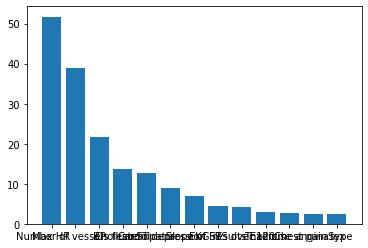

In [36]:
plt.figure()
plt.bar(df_results.index, df_results.f_value)
plt.show()

Vemos que nuestra variable de la frecuencia cardiaca (Max HR) tiene mas relacion lineal con la edad (Age), en segundo lugar la presion arterial (BP).

# **Selección de caracteristícas**

Este conjuntos de datos cuenta con las variables e información necesaria para saber si un persona tiene enfermedad cardiaca o no. 

Tomare la variable Edad (Age) como la variable de respuesta, ya que me interesa saber que si a una mayor edad son mayores las probabilidades de tener una enfermedad cardiaca.

Esto es identificando patrones en los datos donde podamos observar mayor influencia en nuestra variable de respuesta y asi mismo saber que variables regresoras son las que mas afectan y con esto podamos determinar si la persona o paciente tiene enfermedades cardiacas.




# **Umbral de varianza**

Este metodo consisiste en descartar las variables que tengan baja varianza, esto significa que no transmiten mucha informacion al modelo.

In [37]:
# Normalización de variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(scaled, columns = x.columns)
x_scaled


,BP,Max HR,Cardiopatia,Cholesterol,Sex,Chest pain type,FBS over 120,EKG results,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,0.339623,0.290076,0.0,0.447489,1.0,1.000000,0.0,1.0,0.0,0.333333,0.5,1.000000,0.00
1,0.198113,0.679389,1.0,1.000000,0.0,0.666667,0.0,1.0,0.0,0.333333,0.5,0.000000,1.00
2,0.283019,0.534351,0.0,0.308219,1.0,0.333333,0.0,0.0,0.0,0.000000,0.0,0.000000,1.00
3,0.320755,0.259542,1.0,0.312785,1.0,1.000000,0.0,0.0,1.0,0.000000,0.5,0.333333,1.00
4,0.245283,0.381679,1.0,0.326484,0.0,0.333333,0.0,1.0,1.0,0.000000,0.0,0.333333,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.735849,0.694656,1.0,0.166667,1.0,0.666667,1.0,0.0,0.0,0.166667,0.0,0.000000,1.00
266,0.245283,0.778626,1.0,0.312785,1.0,0.333333,0.0,0.0,0.0,0.000000,0.0,0.000000,1.00
267,0.433962,0.625954,1.0,0.383562,0.0,0.333333,0.0,1.0,0.0,0.166667,0.5,0.000000,0.00
268,0.433962,0.587786,1.0,0.150685,1.0,1.000000,0.0,0.0,0.0,0.000000,0.5,0.000000,0.75


In [41]:
from sklearn.feature_selection import VarianceThreshold

In [42]:
selector = VarianceThreshold()
selector.fit_transform(x_scaled)
selector.variances_

array([0.02828902, 0.03115569, 0.24691358, 0.01387363, 0.21839506,
       0.09992532, 0.12620027, 0.24802469, 0.22097394, 0.03997104,
       0.0940192 , 0.09862673, 0.23451303])

In [43]:
# Se agregan las varianzas a los resultados
df_results['variance'] = selector.variances_
df_results.sort_values('variance', ascending = False, inplace = True)
df_results

,f_value,variance
Chest pain type,2.541314,0.248025
Sex,2.409754,0.246914
Cholesterol,13.638271,0.234513
Exercise angina,2.614737,0.220974
Cardiopatia,12.651991,0.218395
ST depression,8.913503,0.126200
Slope of ST,7.020620,0.099925
Max HR,51.724089,0.098627
Number of vessels fluro,38.914759,0.094019
Thallium,3.051268,0.039971


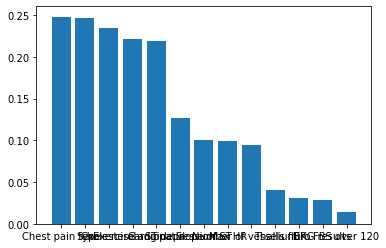

In [44]:
plt.figure()
plt.bar(df_results.index, df_results.variance)
plt.show()

Tomamos en cuenta que para que el modelo elimine las variables con poca varianza se tiene que tener un nivel por debajo de 0.2. Con esta grafica podemos ver que las que tienen una mayor varianza con nuestra variable de respuesta es tipo de dolor en el pecho, el nivel de colesterol, sexo, ejercicio de angina y cardiopatia.

#  **Valor R de correlación**

Indica el nivel de correlación de nuestra variable de respuesta con las variables regresoras.












In [45]:
from sklearn.feature_selection import r_regression

In [46]:
r_value = r_regression(x, y)
r_value

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0.2730528 , -0.40221545, -0.21232219,  0.22005631, -0.09440069,
        0.09691976,  0.123458  ,  0.12817096,  0.09829655,  0.17941227,
        0.15977363,  0.35608058,  0.10609978])

In [49]:
df_results['r_value'] = r_value
colors = []
for v in df_results['r_value']:
    if v > 0:
        colors.append('b')
    else:
        colors.append('r')
df_results

,f_value,variance,r_value,r_value_abs
Sex,2.409754,0.246914,0.273053,0.402215
EKG results,4.476183,0.028289,-0.402215,0.356081
Chest pain type,2.541314,0.248025,-0.212322,0.273053
Exercise angina,2.614737,0.220974,0.220056,0.220056
Cholesterol,13.638271,0.234513,-0.094401,0.212322
Thallium,3.051268,0.039971,0.096920,0.179412
BP,21.591299,0.031156,0.123458,0.159774
Max HR,51.724089,0.098627,0.128171,0.128171
Slope of ST,7.020620,0.099925,0.098297,0.123458
FBS over 120,4.148047,0.013874,0.179412,0.106100


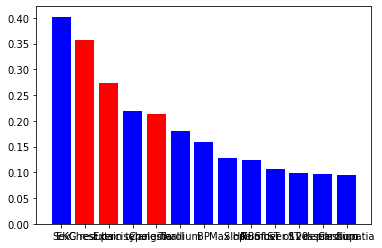

In [48]:
df_results['r_value_abs'] = df_results['r_value'].abs()
df_results.sort_values('r_value_abs', inplace = True, ascending = False)
plt.figure()
plt.bar(df_results.index, df_results.r_value_abs, color = colors)
plt.show()


Observamos que nuestra variable Cardiopatia es la que menos correlación tiene y nuestra variable sexo tiene la mayor correlación.



# **Conclusiones**

Estas pruebas nos dan una mejor idea de que características son las que tienen una mayor influencia con nuestra variable de respuesta. Las mas relevantes son algunas de las siguientes.

*  Chest type pain
*  Sex
*  Cholesterol
*  Excercise angina
*  Max HR




# **Referencias**

[Informatics Education: Heart Disease Prediction](https://data.world/informatics-edu/heart-disease-prediction), University of California Irvine
